# Text analysis of commencement speeches by famous personalities, with NLP

In [ ]:
Many of the wonderful speakers whose commencement addresses are inspirational, worth reading and listening again and again.
This article gets the summary of such addresses, the complexity of the text, the sentiments behind the speech, and the most used
words, given by the famous personalities. 

Natural Language Processing (NLP) is a powerful concept used to teach human language to machines, amongst its many other capabilities. NLP is a blend of computational linguistics, artificial intelligence and computer science. By applying NLP, developers can perform automatic summarization, machine translation, speech recognition,
information retrieval and sentiment analysis. Machine learning algorithms can learn semantic rules by analyzing huge corpuses of text and make inferences on novel text datasets.
     This article specifically focuses on text summarization and sentiment analysis.Text summarization produces synopsis for large documents while sentiment analysis is used to identify the feelings behind a piece of text.


### Single document and multidocument analysis

For single as well as multidocument analysis we are going to execute the following tasks

1. Deriving the complexity
2. Visualizing the document with wordcloud
3. Getting the summary of the text
4. Perform sentiment analysis

###  Natural Language Toolkit (NLTK)
NLTK is an open source Python library that provides modules for processing text, classifying, tokenizing, stemming, tagging, parsing and much more.
   
    

Python is mandatory for this analysis, so make sure python is installed before installing nltk

Open python and install nltk with pip install nltk command.

!pip install nltk
    

In [1]:
import nltk

In [2]:
import warnings
warnings.filterwarnings("ignore")

Single document analysis uses former president of India Dr.APJ.Abdul Kalam's speech at IIT TechFest, Hyderabad.

###  1. Deriving the complexity

Identifying complexity factors

Average word length:     Longer words in a sentence adds to complexity
Average sentence length: Longer sentences in a text are more complex
Vocabulary:              The ratio of unique words used to the total number of words
                         If there are many number of unique words then complexity increases.


A token is the base unit of analysis. Eg: a word. So,the first step is to convert text into tokens and nltk text object. Text can be split into sentences with sent_tokenize() and a sentence can be split into words using the method word_tokenize():

Open the file and analyze the text for its complexity.

In [3]:
with open('Dr_Abdulkalam.txt', 'r') as f:
    speech = f.read()

In [4]:
from nltk import sent_tokenize,word_tokenize
def text_complexity(text):
    num_chars=len(text)
    print(num_chars)
    num_words=len(word_tokenize(text))
    print(num_words)
    num_sentences=len(sent_tokenize(text))
    print(num_sentences)
    vocab = {x.lower() for x in word_tokenize(text)}
    #print(vocab)
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words

In [5]:
text_complexity(speech)

10557
2215
146


(755, 4, 15, 0.34085778781038373)

### 2. Visualizing the document with word clouds

Word Cloud is a data visualization approach in python for representing text,
in which the size of each word indicates its frequency of occurrence. Important
textual data points can be highlighted using colors of various sizes in a word cloud.
Python's matplotlib is used as a plotting tool.


In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

Before forming the word cloud we remove words that would add minimal value to the variable, Eg: words with character length less than 4 are removed.

In [7]:

MIN_LENGTH = 4
def remove_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


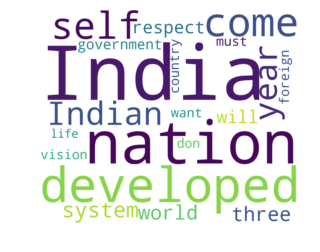

In [8]:
text_string = remove_words(speech)  
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


###  3. Getting the summary of the text 

Gensim is a Python library for topic modelling,text summary, document indexing and similarity retrieval with large corpora.
This software depends on NumPy and Scipy, two popular Python packages for scientific computing. For further details, refer to this link.
https://www.pydoc.io/pypi/gensim-3.2.0/autoapi/summarization/summarizer/index.html

Gensim's gensim.summarization module is an implementation of TextRank, an unsupervised algorithm based 
on weighted-graphs.It is built on top of the popular PageRank algorithm 
that Google uses for ranking webpages. 


Steps performed by the TextRank algorithm is as follows:
    
1.Pre-processing the text by removing stop words and stemming the remaining words

2.Creating a graph where vertices are sentences

3.Connecting every sentence to every other sentence by an edge. The weight of the edge is based on the similarity 
  between the two sentences
    
4.Run the PageRank algorithm on the graph

5.Select the sentences with the highest PageRank score

Let us install the gensim library

In [ ]:
!pip install gensim

Using the "word_count" parameter, we specify the maximum amount of words we want in the summary.
Below we have specified that we want no more than 50 words.

In [9]:
import gensim.summarization
text = speech
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
summary = gensim.summarization.summarize(striptext, word_count=100) 
print(summary)

In 3000 years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds.
Because I believe that unless India stands up to the world, no one will respect us.
The joy of participating with my team in these nuclear tests and proving to the world that India can make it, that we are no longer a developing nation but one of them.
We expect the government to clean up but we are not going to stop chucking garbage all over the place nor are we going to stop to pick up a stray piece of paper and throw it in the bin.


###  4. Perform Sentiment Analysis 

Sentiment Analysis is performed using the vaderSentiment module.  

Vader contains a list of 7500 features with positive and negative weights.
It uses these features to calculate statistics on how positive, negative and neutral a text is.
It also computes a "compound" score based on heuristics (between -1 and +1). Includes sentiment of emoticons, punctuation, and other 'social media' lexicon elements.


Install vaderSentiment module

In [ ]:
!pip install vaderSentiment

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Let us write a function to perform sentiment analysis of the text.

In [11]:
name = 'Dr.Kalam'
def sentiment(text):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(text)
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
    print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

##  Comparative analysis

Let us perform comparative analysis from the commencement addresses given by famous personalities at Harvard University.

These texts are stored in four separate files, one for each personality.

1. Open the text
2. Read the contents
3. Store them in a list of tuples

In [13]:
with open('Bill Gates.txt','r')  as f:
    content1 = f.read()
with open('JK.Rowling.txt','r')  as f:
    content2 = f.read()
with open('Mark Zuckerberg.txt','r')  as f:
    content3 = f.read()   
with open('Oprahwinfrey.txt','r')  as f:
    content4 = f.read() 

In [14]:
inspiring_speech=[('Bill Gates',content1),('JK.Rowling',content2),('Markzuckerberg',content3),('Oprahwinfrey',content4)]

Let us view the contents of the Author JK.Rowling.

In [15]:
inspiring_speech[1][1]

'Delivering a commencement address is a great responsibility; or so I thought until I cast my mind back to my own graduation. The commencement speaker that day was the distinguished British philosopher Baroness Mary Warnock. Reflecting on her speech has helped me enormously in writing this one, because it turns out that I can’t remember a single word she said. This liberating discovery enables me to proceed without any fear that I might inadvertently influence you to abandon promising careers in business, the law or politics for the giddy delights of becoming a gay wizard.\n\nYou see? If all you remember in years to come is the ‘gay wizard’ joke, I’ve come out ahead of Baroness Mary Warnock. Achievable goals: the first step to self improvement.\n\nActually, I have wracked my mind and heart for what I ought to say to you today. I have asked myself what I wish I had known at my own graduation, and what important lessons I have learned in the 21 years that have expired between that day an

The tasks here:

1. Get comparative complexities in texts
2. Draw word cloud for each text
3. Derive the summary of texts
4. Do the sentiment analysis

Let us use the functions already defined, we will find the
complexity of each text.

In [16]:
texts=inspiring_speech
for text in texts:
    (vocab,word_size,sent_size,vocab_to_text) = text_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))

16896
3468
155
Bill Gates     	888.00	4.00	22.00	0.26
15292
3064
120
JK.Rowling     	940.00	4.00	25.00	0.31
17105
3673
222
Markzuckerberg 	872.00	4.00	16.00	0.24
20568
4375
197
Oprahwinfrey   	1041.00	4.00	22.00	0.24


Draw the wordcloud for each one of them.

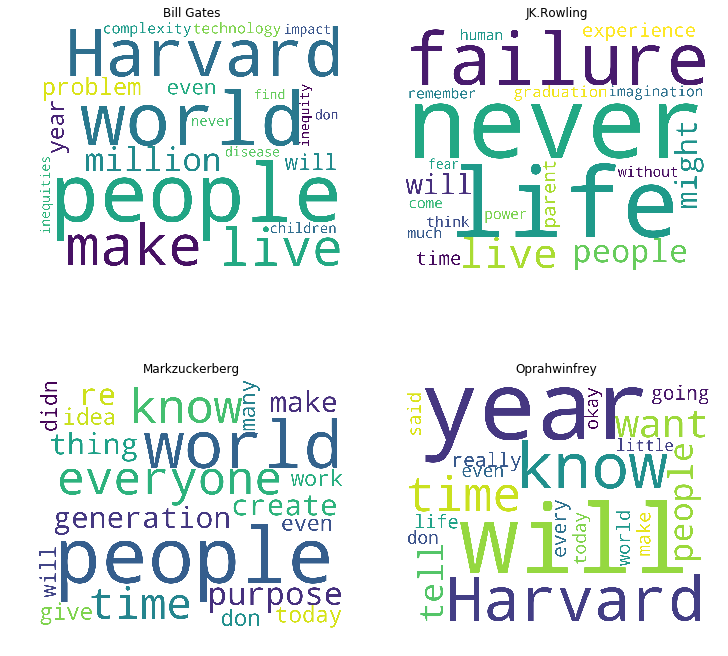

In [17]:
texts = inspiring_speech
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

#Remove short words
MIN_LENGTH = 4
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(texts)):
    text_string = remove_words(texts[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i%2]
    ax = axes[i//2, i%2] #Use this if ROW_NUM >=2
    ax.set_title(texts[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

Finally get the summary of each text

In [18]:
def summary(texts):
    
    for text in texts:
        print(text[0])
        summary_sentences = []
        candidate_sentences = {}
        candidate_sentence_counts = {}
        striptext = text[1].replace('\n\n', ' ')
        striptext = striptext.replace('\n', ' ')
        summary = gensim.summarization.summarize(striptext, word_count=100) 
        print(summary)
        print('*'*126)

In [19]:
summary(inspiring_speech)


Bill Gates
I left Harvard with no real awareness of the awful inequities in the world – the appalling disparities of health, and wealth, and opportunity that condemn millions of people to lives of despair.
Imagine, just for the sake of discussion, that you had a few hours a week and a few dollars a month to donate to a cause – and you wanted to spend that time and money where it would have the greatest impact in saving and improving lives.
There is no question that the faculty, the alumni, the students, and the benefactors of Harvard have used their power to improve the lives of people here and around the world.
******************************************************************************************************************************
JK.Rowling
I cannot remember telling my parents that I was studying Classics; they might well have found out for the first time on graduation day.
What I feared most for myself at your age was not poverty, but failure.At your age, in spite of a distinct

Find out the sentiments in their speech.

In [20]:
def comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t\t    ",'pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    
    for i in range(len(texts)):
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-20s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [21]:

comparison(inspiring_speech)

Name		     pos	 neg	 neu	 compound
Bill Gates           0.12	 0.07	 0.81	 0.14	
JK.Rowling           0.11	 0.09	 0.80	 0.07	
Markzuckerberg       0.12	 0.05	 0.83	 0.13	
Oprahwinfrey         0.14	 0.04	 0.82	 0.18	


So we found out the complexity of the commencement addresses given by Bill Gates, JK Rowling, Mark Zuckerberg, Oprah Winfrey, derived and visualized the summary of each address and quantitatively characterized the positive and negative feelings in their addresses. Hope you learnt something useful from this analysis, feel free to leave your comments and suggestions in the comments section.